In [43]:
!pip install causalnex networkx

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import sys
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import networkx as nx
import matplotlib.pyplot as plt

# Chargez vos données depuis le fichier CSV
print(sys.path)
df = pd.read_csv('FMR/ICPB/dataset_pca.csv')


['/Users/hakimmarco/CS_3A', '/Users/hakimmarco/opt/anaconda3/lib/python39.zip', '/Users/hakimmarco/opt/anaconda3/lib/python3.9', '/Users/hakimmarco/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/hakimmarco/.local/lib/python3.9/site-packages', '/Users/hakimmarco/opt/anaconda3/lib/python3.9/site-packages', '/Users/hakimmarco/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/hakimmarco/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/Users/hakimmarco/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/Users/hakimmarco/.ipython']


In [45]:
df

,Mouvements Sociaux et Politiques,Transport et Infrastructures,Éducation et Jeunesse,Environnement et Changements Climatiques,Public et Opinion,Services,Travail,Économie,Événements Socio-économiques,Conditions de vie,Contexte Extérieur,Identités et Personnalités,Immigration et Législation,Technologie et Innovation,Indicateur
0,-0.116289,-0.307289,0.286628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1
1,0.000000,-0.183537,0.000000,-0.149562,0.096861,-0.330436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.397312,0.303648,-0.240421,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,-0.267880,-0.070237,0.000000,0.000000,0.000000,0.000000,0.353867,-0.145342,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.254511,0.303648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,-0.242152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.118891,0.000000,0.000000,0.000000,-1
6,0.000000,0.000000,0.000000,0.000000,-0.247320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.037022,-0.234471,0.000000,-1
7,0.299109,0.399814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.313456,0.000000,0.000000,1
8,0.000000,0.000000,0.000000,0.093419,0.000000,0.000000,0.000000,0.000000,0.000000,-0.317034,0.000000,0.000000,0.000000,0.000000,0
9,-0.058846,0.000000,0.000000,-0.149562,0.096861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [46]:
from causalnex.structure.notears import from_pandas
from causalnex.structure import StructureModel


# Utilisez l'algorithme PC pour apprendre la structure causale
df['Indicateur'] = df['Indicateur'].apply(lambda x: 1 if x == 1 else 0)
sm = from_pandas(df, tabu_parent_nodes=['Indicateur'], max_iter=1000)

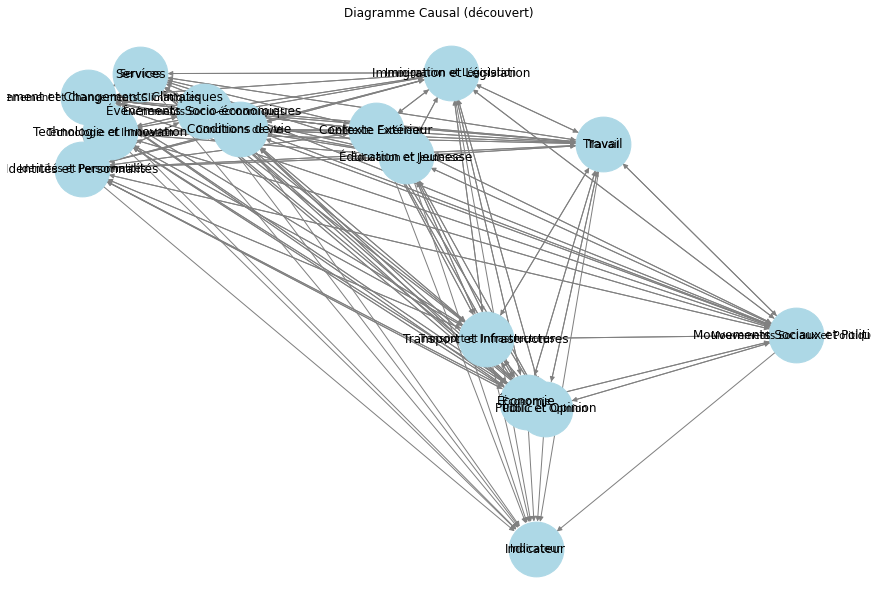

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(sm, seed=42)  # Réglez la disposition des nœuds selon vos préférences

# Personnalisez le style des nœuds et des arêtes
nx.draw(
    sm,
    pos,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',  # Spécifiez une couleur pour les nœuds
    font_size=10,
    font_color='black',
    node_shape='o',  # Spécifiez une forme pour les nœuds (par exemple, 'o' pour un cercle)
    edge_color='gray',  # Spécifiez une couleur pour les arêtes
    width=1.0,  # Spécifiez l'épaisseur des arêtes
)

labels = {node: node for node in sm.nodes()}
nx.draw_networkx_labels(sm, pos, labels=labels, font_size=12)
nx.draw_networkx_edge_labels(sm, pos, edge_labels={edge: '' for edge in sm.edges()}, font_size=10)

plt.title("Diagramme Causal (découvert)")
plt.show()

